# Adidas Fashion Product Analysis
https://www.kaggle.com/datasets/thedevastator/adidas-fashion-retail-products-dataset-9300-prod 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing the data and printing the head of data
adidas_data = pd.read_csv(r"C:\Users\lilye\OneDrive\Documents\Datasets for Portfolio Build\adidas dataset\adidas_usa.csv")
adidas_data.head()


,index,url,name,sku,selling_price,original_price,currency,availability,color,category,...,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,...,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,...,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,...,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,...,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,...,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


## Data Cleaning and Preprocessing

In [2]:
# Cleaning the dataset, removing columns we do not need. 
adidas_data_new = adidas_data.drop(['url', 'index','sku','source_website','images', 'availability', 'description','crawled_at', 'currency', 'brand','country','source', 'language'], axis=1)
adidas_data_new.head()

,name,selling_price,original_price,color,category,breadcrumbs,average_rating,reviews_count
0,Beach Shorts,40,NaN,Black,Clothing,Women/Clothing,4.5,35
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,NaN,Grey,Shoes,Women/Shoes,4.8,4
2,Mexico Away Jersey,70,NaN,White,Clothing,Kids/Clothing,4.9,42
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,NaN,Black,Shoes,Five Ten/Shoes,3.7,7
4,Mesh Broken-Stripe Polo Shirt,65,NaN,Blue,Clothing,Men/Clothing,4.7,11


In [3]:
adidas_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            845 non-null    object 
 1   selling_price   845 non-null    int64  
 2   original_price  829 non-null    object 
 3   color           845 non-null    object 
 4   category        845 non-null    object 
 5   breadcrumbs     845 non-null    object 
 6   average_rating  845 non-null    float64
 7   reviews_count   845 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 52.9+ KB


In [4]:
adidas_data_new.describe()

,selling_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000
mean,53.192899,4.608402,426.178698
std,31.411645,0.293795,1229.158277
min,9.000000,1.000000,1.000000
25%,28.000000,4.500000,19.000000
50%,48.000000,4.700000,68.000000
75%,70.000000,4.800000,314.000000
max,240.000000,5.000000,11750.000000


In [5]:
# Checking for null values in the set
print(adidas_data_new.isnull().sum())

name               0
selling_price      0
original_price    16
color              0
category           0
breadcrumbs        0
average_rating     0
reviews_count      0
dtype: int64


In [6]:
# Removing null data 
adidas_data_new = adidas_data_new.dropna(axis=0)

In [7]:
# Common Product:
repeated_product_name=adidas_data_new['name'].mode()[0]
print('maximum repeated product name is : \n ' ,repeated_product_name )
max_repeated=adidas_data_new['name'].value_counts().max()
print('maximum repeated product name value is : \n ' ,max_repeated)

maximum repeated product name is : 
  ZX 1K Boost Shoes
maximum repeated product name value is : 
  24


In [8]:
# Counting each of the unique names of products
adidas_data_new['name'].value_counts()

ZX 1K Boost Shoes                                                          24
ZX 2K Boost Shoes                                                          18
Superstar Shoes                                                            15
EQ21 Run Shoes                                                             13
Racer TR21 Shoes                                                           12
                                                                           ..
Graphic Tee                                                                 1
Long Sleeve Graphic Tee                                                     1
Adicolor Classics Oversized Sweatshirt​                                     1
Primegreen Essentials Comfort Fleece Loose Cropped 3-Stripes Sweatshirt     1
Jacquard Trefoil Crew Socks 2 Pairs                                         1
Name: name, Length: 417, dtype: int64

In [9]:
adidas_data_new.head()

,name,selling_price,original_price,color,category,breadcrumbs,average_rating,reviews_count
15,Essentials Loose Logo Tank Top,20,$25,Purple,Clothing,Women/Clothing,4.8,116
16,Essentials Loose Logo Tank Top,20,$25,Pink,Clothing,Women/Clothing,4.8,116
18,Essentials Loose Logo Tank Top,20,$25,Green,Clothing,Women/Clothing,4.8,116
19,Formotion Sculpt Tights,48,$80,Blue,Clothing,Women/Clothing,4.2,144
20,Marvel X Ghosted.3 Firm Ground Cleats,64,$80,Blue,Shoes,Soccer/Shoes,4.4,160


In [10]:
from pandas_profiling import ProfileReport
profilereport = ProfileReport(adidas_data_new)
profilereport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis
Research questions:

array([[<AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'average_rating'}>],
       [<AxesSubplot:title={'center':'reviews_count'}>, <AxesSubplot:>]],
      dtype=object)

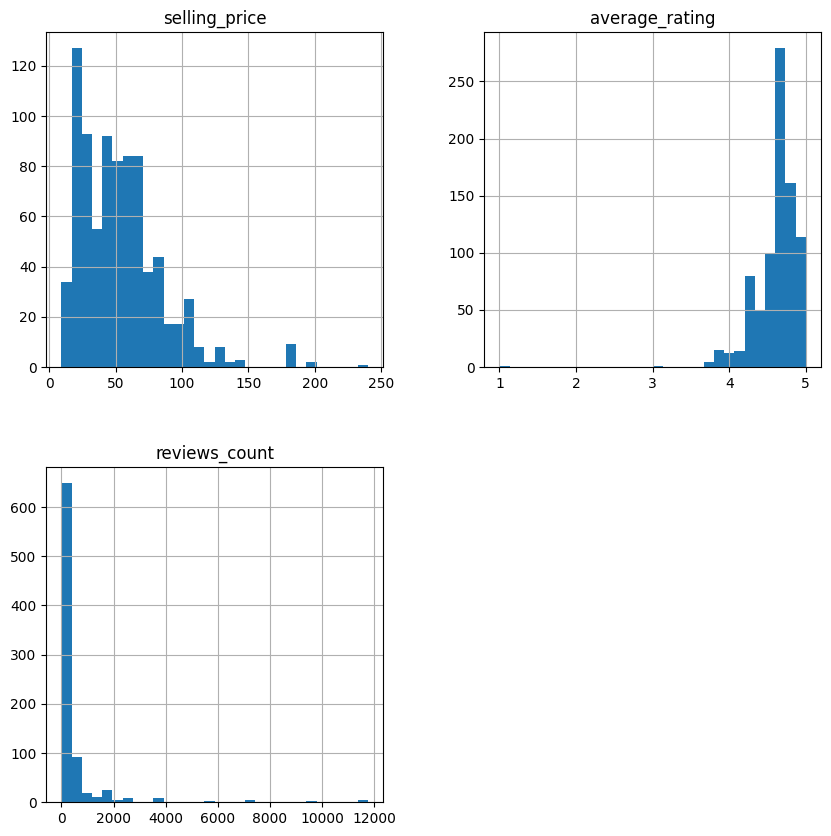

In [11]:
# Distribution Plots for all columns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
adidas_data_new.hist(bins=30)


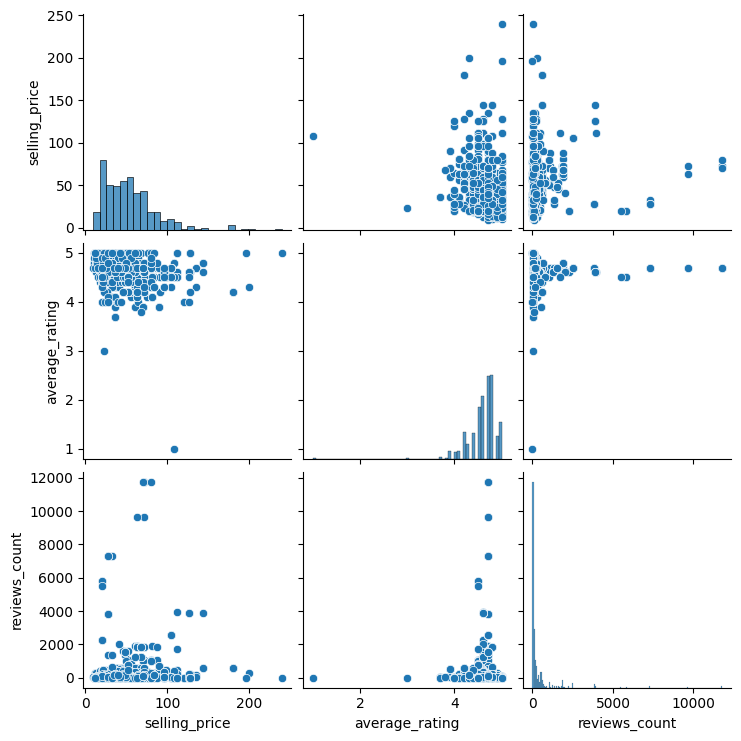

In [12]:
sns.pairplot(data=adidas_data_new)

### Research Question: What categories have the highest total count of reviews? 
Do shoes produce more reviews from customers than clothing or accessories items? 


number of reviews in each category is : 
              reviews_count
category                  
Accessories             79
Clothing               328
Shoes                  422


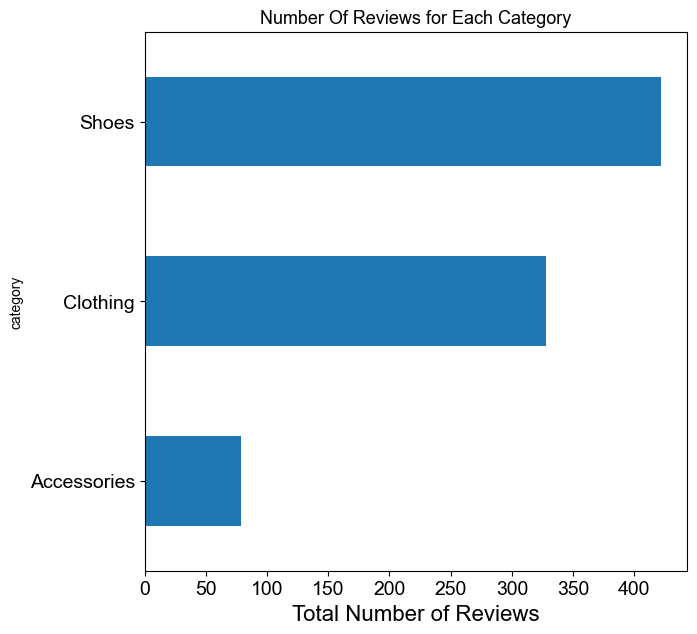

In [13]:
# Calculate the average number of reviews for each product category
reviews_per_category=adidas_data_new.groupby('category')['reviews_count'].count()
print('number of reviews in each category is : \n',reviews_per_category.to_frame())

#plot bar chart to show variation in number of products in each brand
reviews_per_category.plot(kind='barh',fontsize=14,figsize=(7,7));
#determine title and labels for the chart
plt.title('Number Of Reviews for Each Category',fontsize = 13)
plt.xlabel('Total Number of Reviews',fontsize = 16)
sns.set_style("whitegrid")

The horizontal bar graph displays the Shoes category containing the highest number of total reviews.

### Research Question: What are the 5 most popular Adidas product? What is the average rating for each of the top 5 products and what is their number of reviews? 

Average rating in each product is : 
                    average_rating
name                             
ZX 1K Boost Shoes        4.241667
ZX 2K Boost Shoes        4.677778
Superstar Shoes          4.773333
EQ21 Run Shoes           4.569231
Racer TR21 Shoes         4.666667


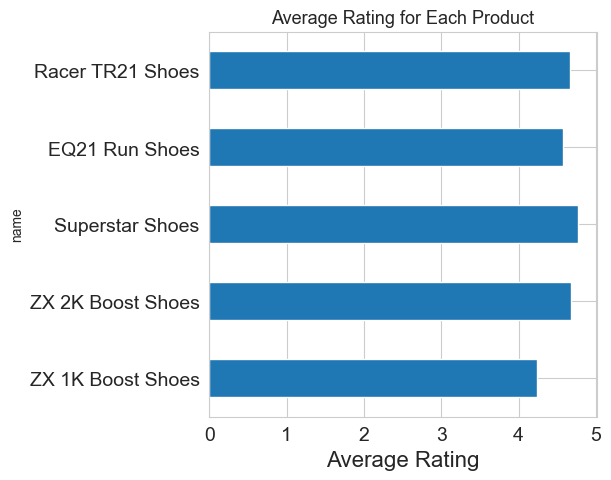

In [14]:
# Getting the most popular 5 products and plotting the average rating of each product, and the number of reviews.
n = 5
max_names = adidas_data_new['name'].value_counts()[:n].index.tolist()
max_names
rating_per_name = adidas_data_new.groupby('name')['average_rating'].mean().loc[max_names]
print('Average rating in each product is : \n',rating_per_name.to_frame())
#plot bar chart 
rating_per_name.plot(kind='barh',fontsize=14,figsize=(5,5));
#determine title and labels for the chart
plt.title('Average Rating for Each Product',fontsize = 13)
plt.xlabel('Average Rating',fontsize = 16)
sns.set_style("whitegrid")

Number of reviews for each product is : 
                    reviews_count
name                            
ZX 1K Boost Shoes             24
ZX 2K Boost Shoes             18
Superstar Shoes               15
EQ21 Run Shoes                13
Racer TR21 Shoes              12


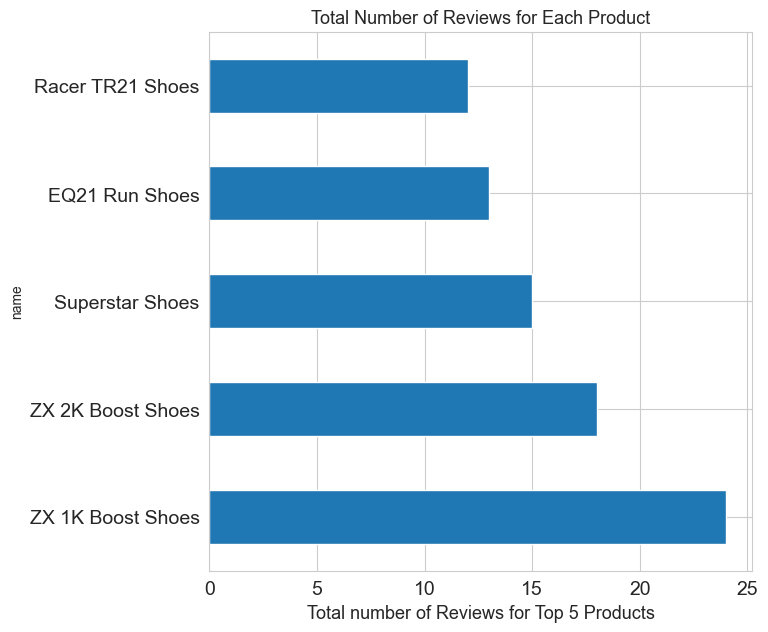

In [15]:
# Getting the most popular 5 products and plotting the average rating of each product, and the number of reviews.
n = 5
max_names = adidas_data_new['name'].value_counts()[:n].index.tolist()
max_names

reviews_per_name = adidas_data_new.groupby('name')['reviews_count'].count().loc[max_names]
print('Number of reviews for each product is : \n',reviews_per_name.to_frame())
#plot bar chart 
reviews_per_name.plot(kind='barh',fontsize=14,figsize=(7,7));
#determine title and labels for the chart
plt.title('Total Number of Reviews for Each Product',fontsize = 13)
plt.xlabel('Total number of Reviews for Top 5 Products',fontsize = 13)
sns.set_style("whitegrid")

Interesting because the most popular product was the ZX 1K Boost Shoes, which has the highest total number of reviews at 24 reviews, but the the highest average rating product out of the top 5 is the Superstar Shoes.

### Research Question: What is the relationship between the selling price and average rating? Do more expensive products have higher ratings?

<AxesSubplot:xlabel='selling_price', ylabel='average_rating'>

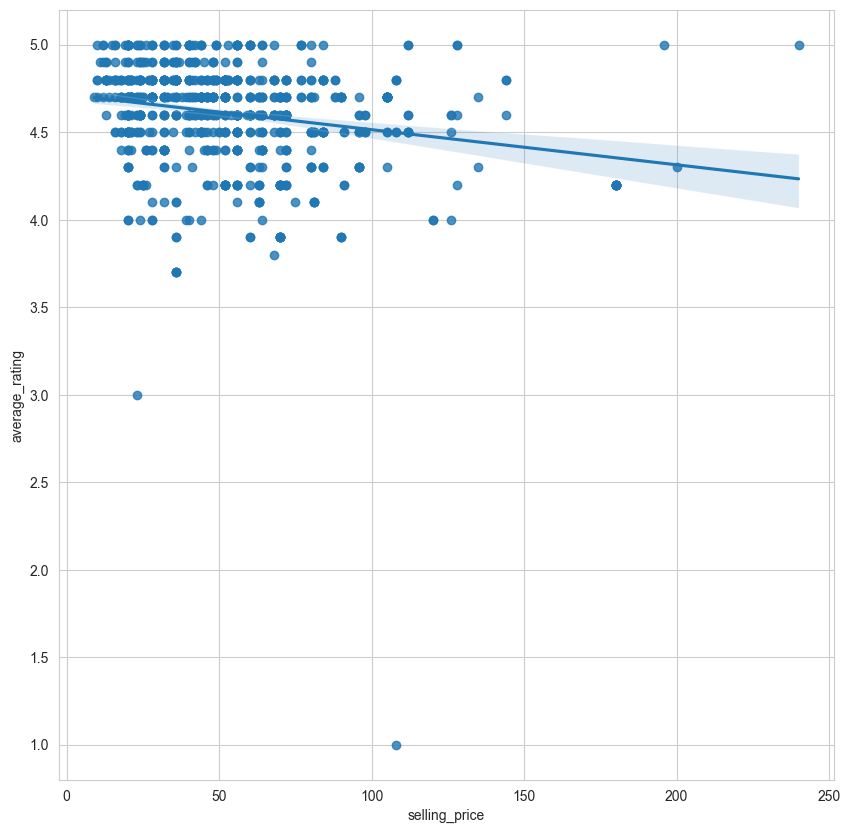

In [16]:
# 
sns.regplot(x=adidas_data_new['selling_price'], y=adidas_data_new['average_rating'])


### Research Question: What is the distribution of selling prices for different categories?


Text(0, 0.5, 'Counts')

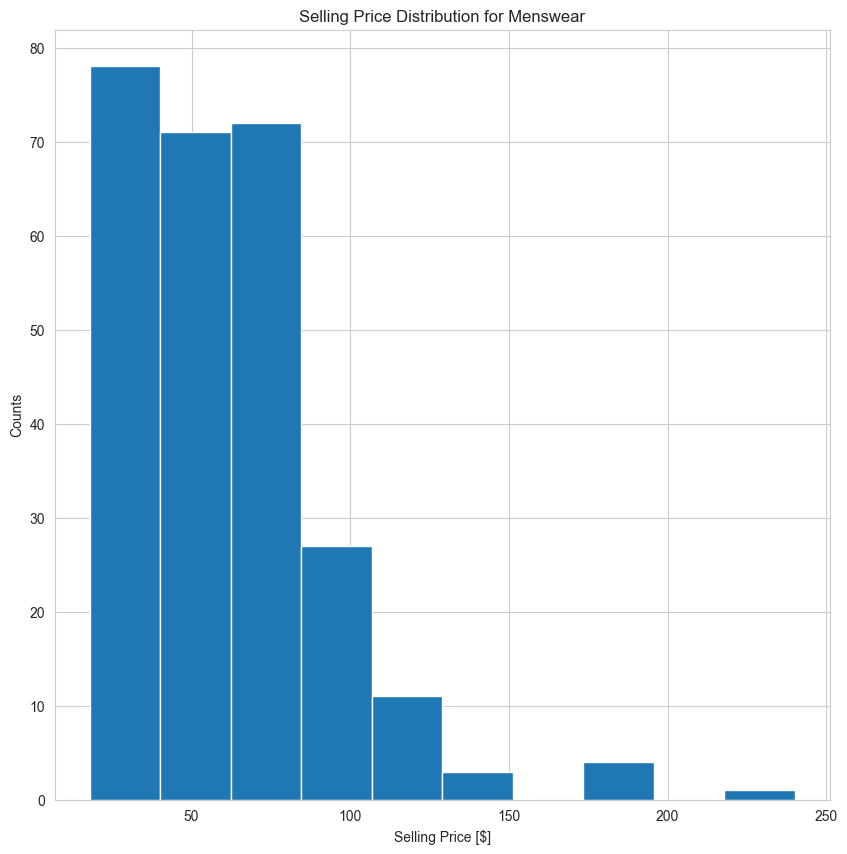

In [17]:
# Acquiring the data for mens wear
mens_clothing_df = adidas_data_new[adidas_data_new['breadcrumbs'].str.contains('Men/Clothing|Men/Shoes')]
selling_price_mencloth = mens_clothing_df['selling_price']
plt.hist(selling_price_mencloth)
plt.title('Selling Price Distribution for Menswear')
plt.xlabel('Selling Price [$]')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

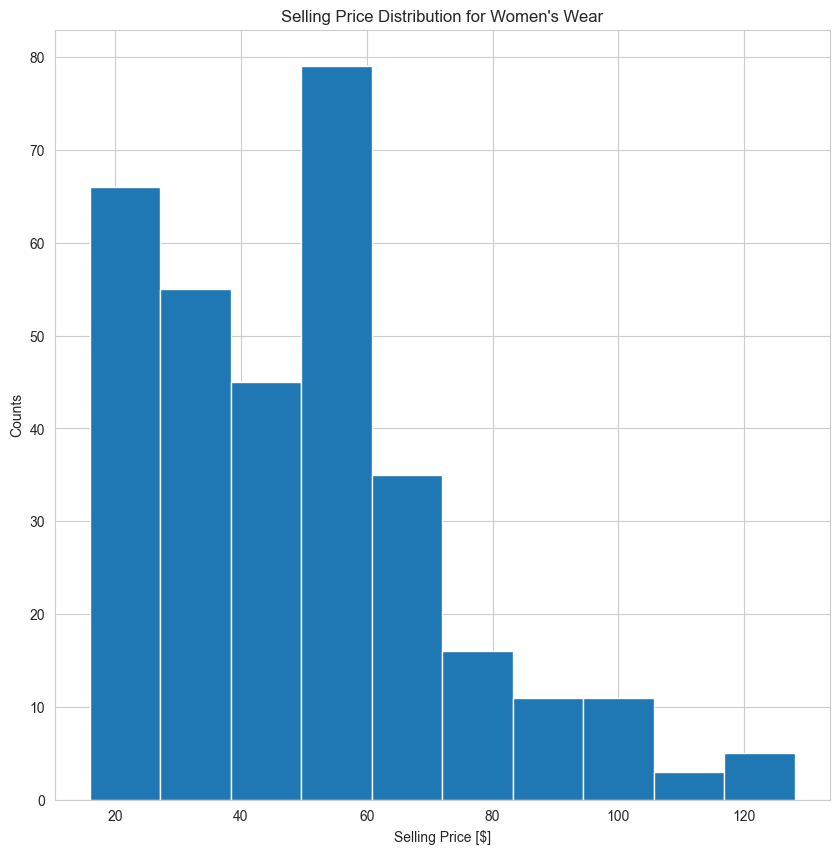

In [18]:
# Acquiring the data for womens wear
women_wear_df = adidas_data_new[adidas_data_new['breadcrumbs'].str.contains('Women/Clothing|Women/Shoes')]
sellingprice_womendf = women_wear_df['selling_price']
plt.hist(sellingprice_womendf)
plt.title("Selling Price Distribution for Women's Wear")
plt.xlabel('Selling Price [$]')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

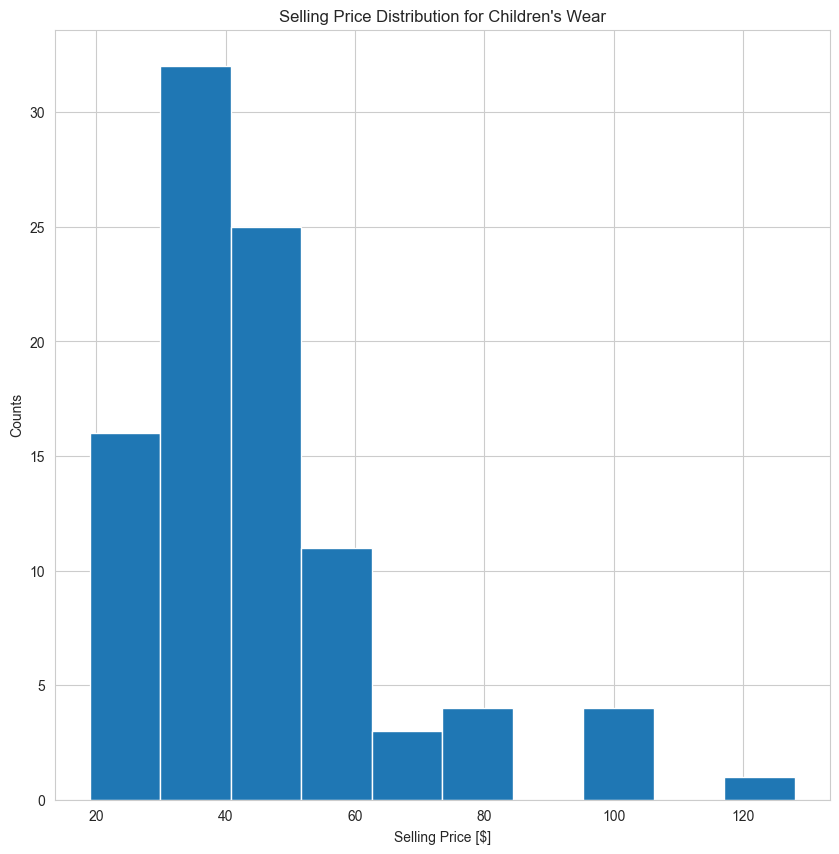

In [19]:
# Acquiring the data for child's wear
import scipy.stats as ss
child_wear_df = adidas_data_new[adidas_data_new['breadcrumbs'].str.contains('Kids/Clothing|Kids/Shoes')]
sellingprice_kid_df = child_wear_df['selling_price']
dist_ch = ss.norm.pdf(sellingprice_kid_df)
plt.hist(sellingprice_kid_df)
plt.title("Selling Price Distribution for Children's Wear")
plt.xlabel('Selling Price [$]')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

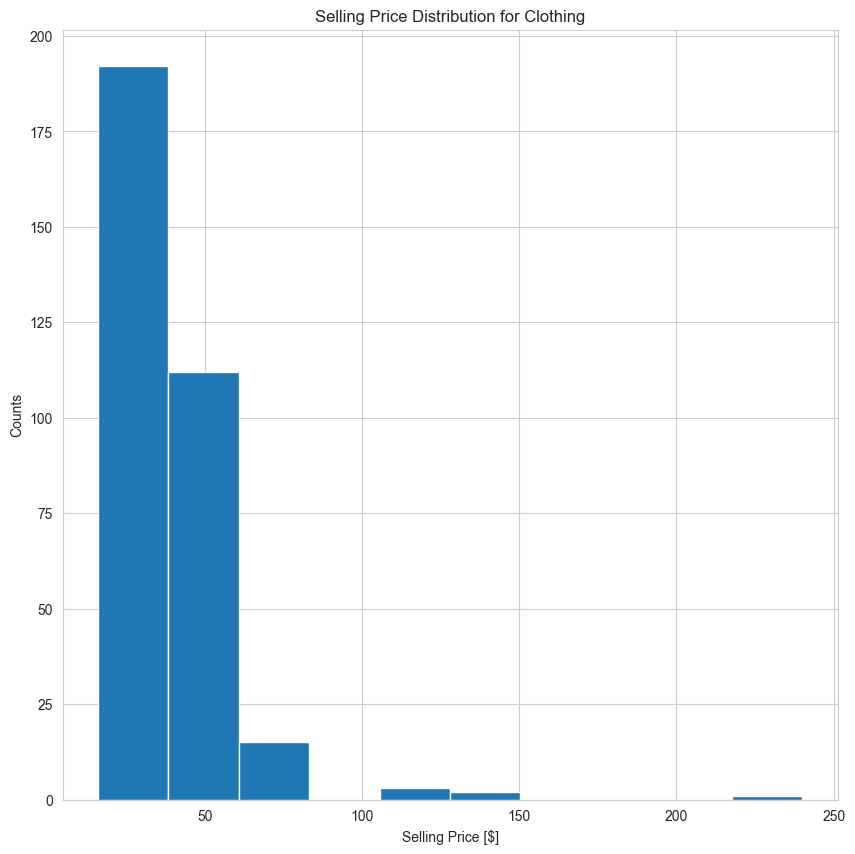

In [20]:
# Acquiring the data for clothing
clothing_df = adidas_data_new[adidas_data_new['breadcrumbs'].str.contains('Kids/Clothing|Men/Clothing|Women/Clothing')]
sellingprice_clothing_df = clothing_df['selling_price']
plt.hist(sellingprice_clothing_df)
plt.title("Selling Price Distribution for Clothing")
plt.xlabel('Selling Price [$]')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

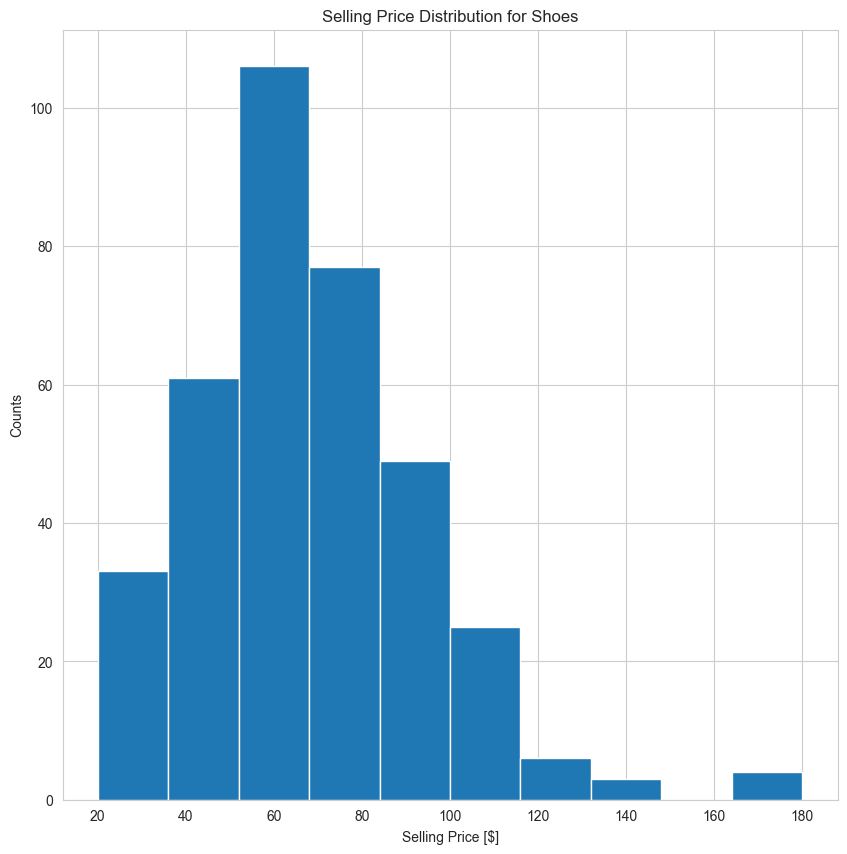

In [21]:
# Acquiring the data for shoes
shoes_df = adidas_data_new[adidas_data_new['breadcrumbs'].str.contains('Kids/Shoes|Men/Shoes|Women/Shoes')]
sellingprice_shoes_df = shoes_df['selling_price']
plt.hist(sellingprice_shoes_df)
plt.title("Selling Price Distribution for Shoes")
plt.xlabel('Selling Price [$]')
plt.ylabel('Counts')

### Research Question: How does the average rating compare to the average number of reviews? 

<AxesSubplot:xlabel='average_rating', ylabel='reviews_count'>

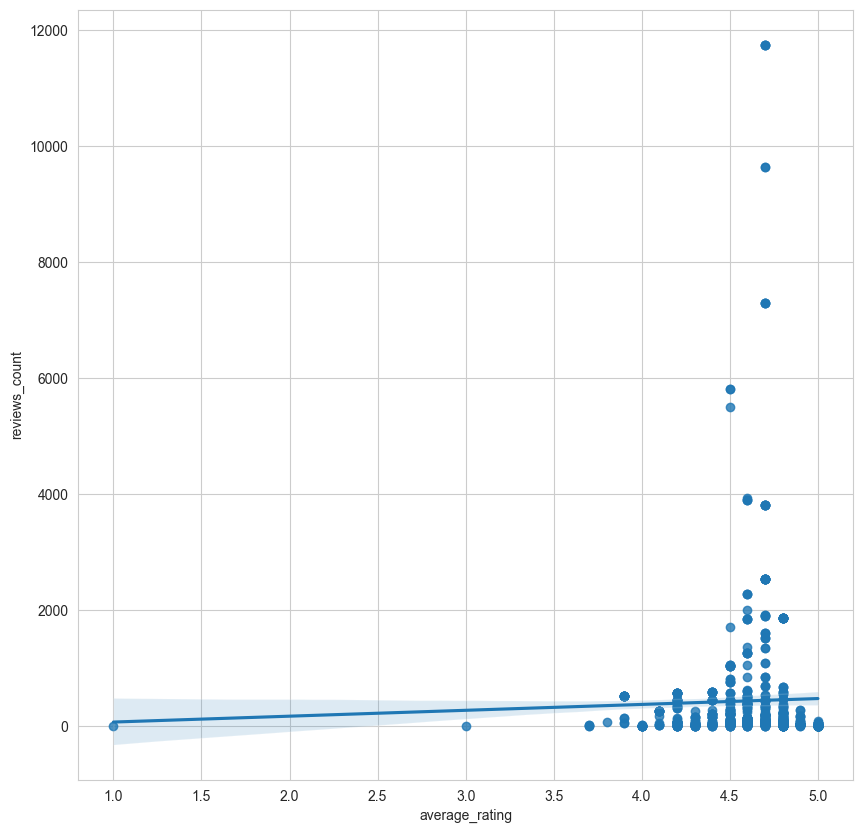

In [22]:
avg_ratings = adidas_data_new['average_rating'] 
avg_num_reviews = adidas_data_new['reviews_count']

sns.regplot(x=avg_ratings, y=avg_num_reviews)